In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.5.2/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_hPa_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_hPa_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
    Time = []
    Months = []
    Birth_Time = []
    Start_Time = []
    End_Time = []
    Death_Time = []
    Peak_Time = []
# Edit Time Format
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
        Months.append(Month(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
        Start_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        End_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Death_Time.append(Datetime(ET_DF["Dissipate Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
    Data_DF["Time(Z)"] = Time
    Data_DF["Month"] = Months
    ET_DF["Genesis Time"] = Birth_Time
    ET_DF["ET Begin Time"] = Start_Time
    ET_DF["ET Complete Time"] = End_Time
    ET_DF["Dissipate Time"] = Death_Time
    ET_DF["Peak Time"] = Peak_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
def Month(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
        Month = New_Time.month
    except:
        Month = numpy.nan
    return (Month)

In [7]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lon_Bins = Create_Bins(-100,20,5)
Lat_Bins = Create_Bins(0,60,5)

In [8]:
Num_Years = numpy.array([90,93,93])

In [9]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri)

In [10]:
print (len(Control_ET))
print (len(RCP45_ET))
print (len(RCP85_ET))

289
200
206


In [11]:
# Function For Creating Cumulative Distribution
def Cum_Dist(Array, Ascend):
    Array = Array[Array > -728]
    if Ascend == True:
        Sorted = numpy.sort(Array)
    else:
        Sorted = numpy.sort(Array)[::-1]
    Len = len(Sorted)
    Density = numpy.arange(0,1.0000001,1/(Len-1))
    return (Sorted, Density)

In [12]:
# Create Function to Plot ET Cumulative Distributions
def ET_Cum_Dist_Plot(Fig, ET_DF_1, ET_DF_2, ET_DF_3, Var, Begin, Ascend, Horiz):
    if Begin == True:
        Axis = Fig.add_subplot(1,2,1)
    else:
        Axis = Fig.add_subplot(1,2,2)
#    else:
#        Axis = Fig.add_subplot(1,1,1)
#
# Apply Cumulative Distribution Function
    Sorted_1, Density_1 = Cum_Dist(ET_DF_1[Var], Ascend)
    Sorted_2, Density_2 = Cum_Dist(ET_DF_2[Var], Ascend)
    Sorted_3, Density_3 = Cum_Dist(ET_DF_3[Var], Ascend)
#
# Plotting
    if Horiz == True:
        Axis.plot(Sorted_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Sorted_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Sorted_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
    else:
        Axis.plot(Density_1, Sorted_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Sorted_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Sorted_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
#
# Formatting Based on Variable
    ET_Cum_Dist_Formatting(Sorted_1, Sorted_2, Sorted_3, Var, Horiz)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [13]:
# Formatting Based on Variable
def ET_Cum_Dist_Formatting(Vals_1, Vals_2, Vals_3, Var, Horiz):
# x Ticks and Lims
    if Var == "ET Begin Lat" or Var == "ET Complete Lat":
        Min = 0
        Max = 60
        Width = 5
    elif Var == "ET Begin Lon" or Var == "ET Complete Lon":
        Min = -100
        Max = 10
        Width = 10
    elif Var == "ET Begin SLP" or Var == "ET Complete SLP":
        Min = 900
        Max = 1020
        Width = 10
    x_Ticks = Create_Bins(Min, Max, Width)
#
# y Ticks and Lims
    if Horiz == True:
        pyplot.xticks(x_Ticks)
        pyplot.xlim(Min, Max)
        pyplot.yticks(Create_Bins(0,1,0.125))
        pyplot.ylim(0,1)
    else:
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(Create_Bins(0,1,0.125))
        pyplot.xlim(0,1)
#
# Labels and Title
    if Horiz == True:
        pyplot.ylabel("Cumulative Frequency Density", fontsize=18)
        if Var == "ET Begin Lon" or Var == "ET Complete Lon":
            pyplot.xlabel("Longitude", fontsize=18)
        elif Var == "ET Begin SLP" or Var == "ET  Complete SLP":
            pyplot.xlabel("Sea Level Pressure (SLP)", fontsize=18)
    else:
        pyplot.xlabel("Cumulative Frequency Density", fontsize=18)
        pyplot.ylabel("Latitude", fontsize=18)
    Title = Var
    pyplot.title(Title, fontsize=25)
#
# Legend
    pyplot.legend(loc=3, fontsize=15)

In [14]:
# Plot Cumulative Density Functions

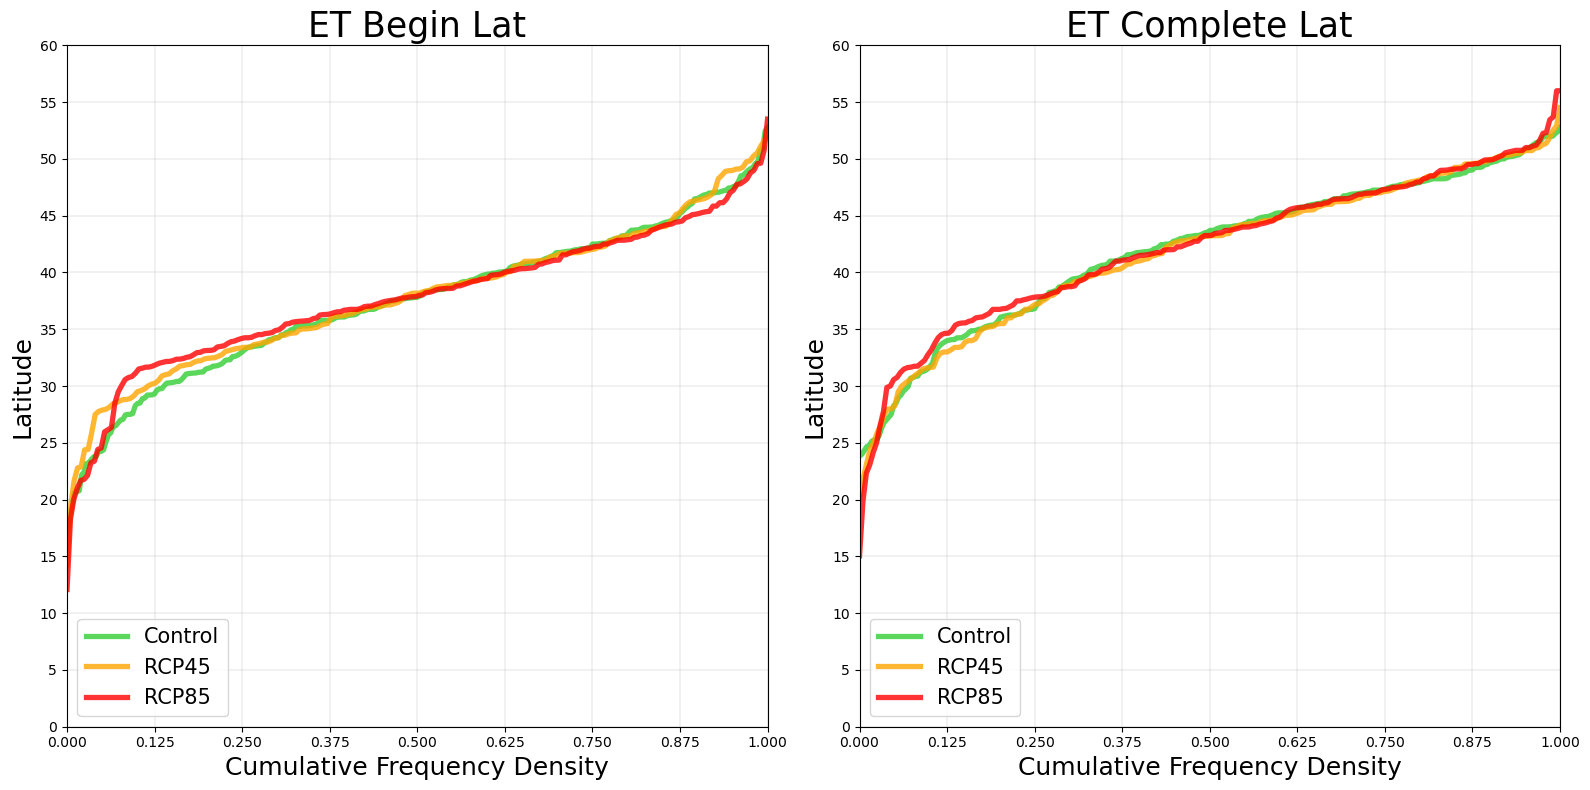

In [15]:
# Latitude
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Begin Lat", True, True, False)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Complete Lat", False, True, False)
pyplot.tight_layout()
Figname = str('ET_Latitude_Cumulative.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

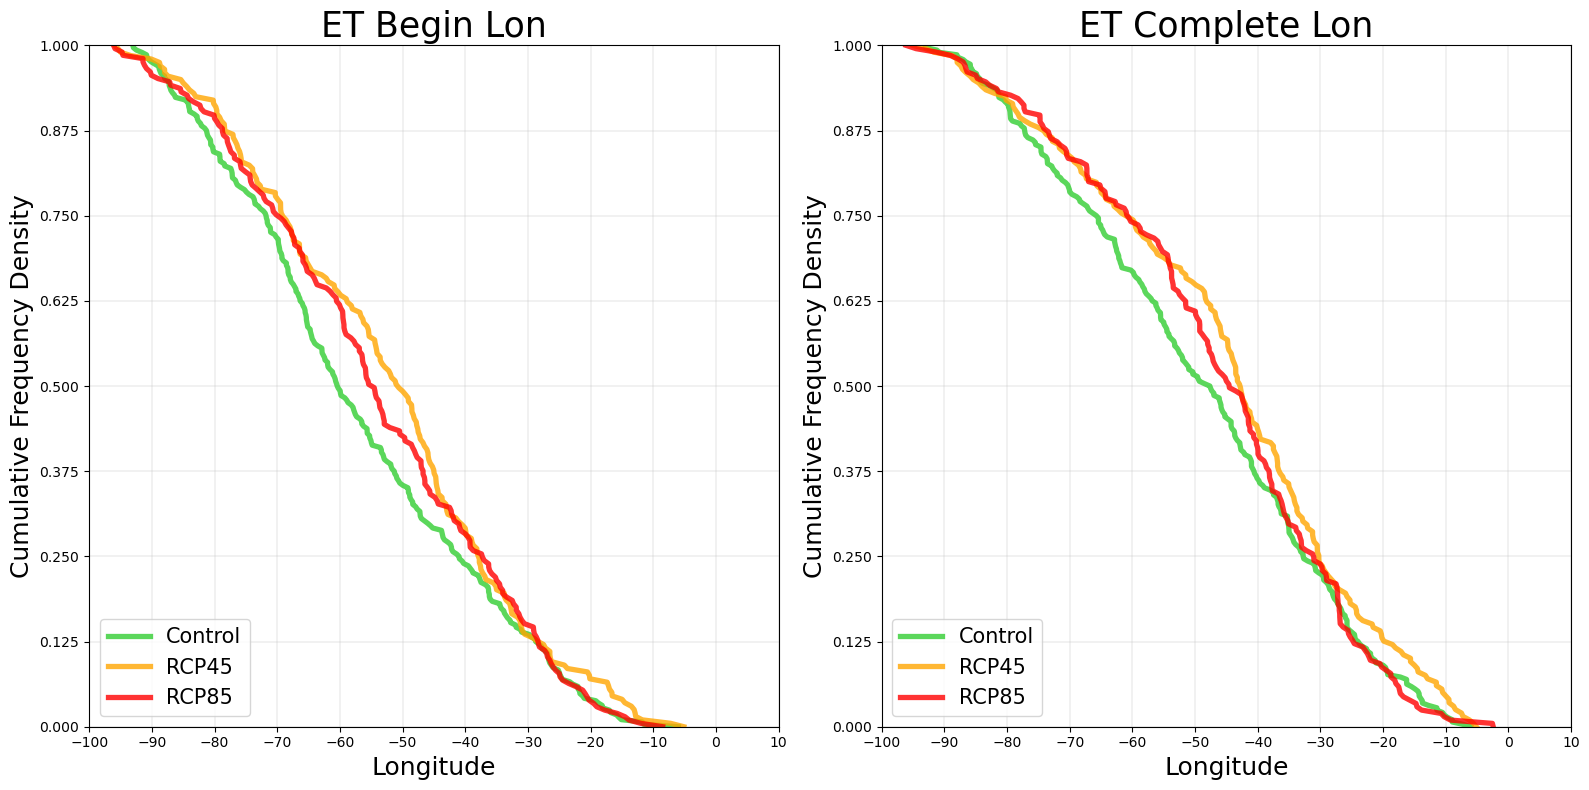

In [16]:
# Longitude
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Begin Lon", True, False, True)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Complete Lon", False, False, True)
pyplot.tight_layout()
Figname = str('ET_Longitude_Cumulative.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

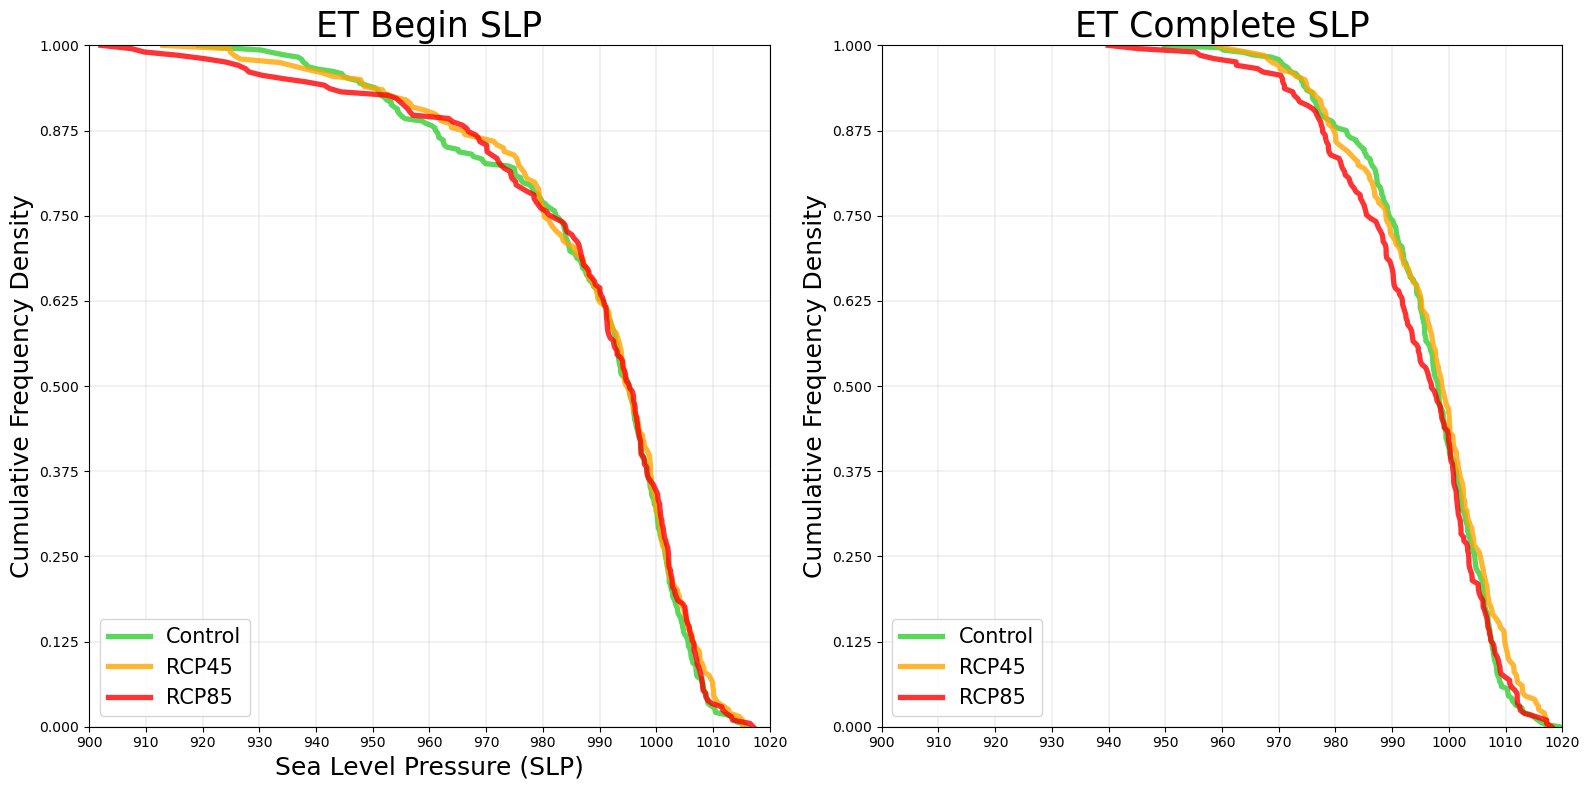

In [17]:
# Sea Level Pressure
Fig = pyplot.figure(figsize=(16,8))
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Begin SLP", True, False, True)
ET_Cum_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Complete SLP", False, False, True)
pyplot.tight_layout()
Figname = str('ET_SLP_Cumulative.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [18]:
# Function to Plot Probability Distribution Functions
def Prob_Dist(Param, Width, Cum_Sorted, Len, Prob_Vals, Range):
    Prob_Count = numpy.zeros(Range+1)
    for k in range(Range):
        if k == 0:
            Vals_Range = []
        elif k == Len-1:
            Vals_Range = []
        else:
            Vals_Range = Cum_Sorted[(Cum_Sorted >= Prob_Vals[k]-Param) & \
            (Cum_Sorted <= Prob_Vals[k]+Param)]
        Prob_Count[k] = len(Vals_Range) * numpy.abs(Width) / (Param * 2)
    return (Prob_Count)

In [19]:
# Function to Plot Probability Distribution Functions
def Prob_Dist_Combine(DF, Var, Ascend, Width, Params):
# Find Cumulative Distribution
    Cum_Sorted, Cum_Density = Cum_Dist(DF[Var], Ascend)
    Len = len(Cum_Sorted)
#
# Prob Distribution
    Start_Val = (int(Cum_Sorted[0] / Width - (Params[1] + 0.001))) * Width
    End_Val = (int(Cum_Sorted[Len-1] / Width + (Params[2] + 1.001))) * Width
    Range = int((End_Val - Start_Val) / Width)
    Prob_Vals = Create_Bins(Start_Val, End_Val, Width)
    Prob_Count_All = numpy.zeros((len(Params), Range+1))
    for l in range(len(Params)):
        Prob_Count_All[l] = Prob_Dist(Params[l], Width, Cum_Sorted, Len, Prob_Vals, Range)
    Prob_Count_Sum = numpy.sum(Prob_Count_All, axis=0)
    Prob_Density = Prob_Count_Sum / numpy.sum(Prob_Count_Sum)
    return (Prob_Vals, Prob_Density)

In [20]:
# Create Function to Plot ET Cumulative Distributions
def ET_Prob_Dist_Plot(Fig, ET_DF_1, ET_DF_2, ET_DF_3, Var, Begin, Ascend, Horiz, Width, Params):
    if Begin == True:
        Axis = Fig.add_subplot(1,2,1)
    else:
        Axis = Fig.add_subplot(1,2,2)
#    else:
#        Axis = Fig.add_subplot(1,1,1)
#
# Apply Probability Distribution Function For Different Params
    Values_1, Density_1 = Prob_Dist_Combine(ET_DF_1, Var, Ascend, Width, Params)
    Values_2, Density_2 = Prob_Dist_Combine(ET_DF_2, Var, Ascend, Width, Params)
    Values_3, Density_3 = Prob_Dist_Combine(ET_DF_3, Var, Ascend, Width, Params)
#
# Plotting
    if Horiz == True:
        Axis.plot(Values_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Values_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Values_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
    else:
        Axis.plot(Density_1, Values_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Values_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Values_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
#
# Formatting Based on Variable
    ET_Prob_Dist_Formatting(Values_1, Values_2, Values_3, Density_1, Density_2, Density_3, Var, Horiz)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [21]:
# Formatting Based on Variable
def ET_Prob_Dist_Formatting(Vals_1, Vals_2, Vals_3, Dens_1, Dens_2, Dens_3, Var, Horiz):
# x Ticks and Lims
    if Var == "ET Begin Lat" or Var == "ET Complete Lat":
        Min = 0
        Max = 60
        Width = 5
    elif Var == "ET Begin Lon" or Var == "ET Complete Lon":
        Min = -100
        Max = 10
        Width = 10
    elif Var == "ET Begin SLP" or Var == "ET Complete SLP":
        Min = 890
        Max = 1020
        Width = 10
    x_Ticks = Create_Bins(Min, Max, Width)
#
# y Ticks and Lims
    Max_Dens = numpy.max([numpy.max(Dens_1), numpy.max(Dens_2), numpy.max(Dens_3)])
    if Max_Dens <= 0.005:
        y_Width = 0.0005
    elif Max_Dens <= 0.01:
        y_Width = 0.001
    elif Max_Dens <= 0.02:
        y_Width = 0.002
    elif Max_Dens <= 0.05:
        y_Width = 0.005
    elif Max_Dens <= 0.1:
        y_Width = 0.01
    elif Max_Dens <= 0.2:
        y_Width = 0.02
    else:
        y_Width = 0.05
    y_Max = (int(Max_Dens / y_Width) + 1) * y_Width
    y_Ticks = Create_Bins(0, y_Max, y_Width)
    if Horiz == True:
        pyplot.xticks(x_Ticks)
        pyplot.xlim(Min, Max)
        pyplot.yticks(y_Ticks)
        pyplot.ylim(0,y_Max)
    else:
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(y_Ticks)
        pyplot.xlim(0,y_Max)
#
# Labels and Title
    if Horiz == True:
        pyplot.ylabel("Probability Frequency Density", fontsize=18)
        if Var == "ET Begin Lon" or Var == "ET Complete Lon":
            pyplot.xlabel("Longitude", fontsize=18)
        elif Var == "ET Begin SLP" or Var == "ET  Complete SLP":
            pyplot.xlabel("Sea Level Pressure (SLP)", fontsize=18)
    else:
        pyplot.xlabel("Probability Frequency Density", fontsize=18)
        pyplot.ylabel("Latitude", fontsize=18)
    Title = Var
    pyplot.title(Title, fontsize=25)
#
# Legend
    if Var == "ET Begin Lat" or Var == "ET Complete Lat":
        pyplot.legend(loc=4, fontsize=15)
    else:
        pyplot.legend(loc=2, fontsize=15)

In [22]:
# Plot Probability Density Functions

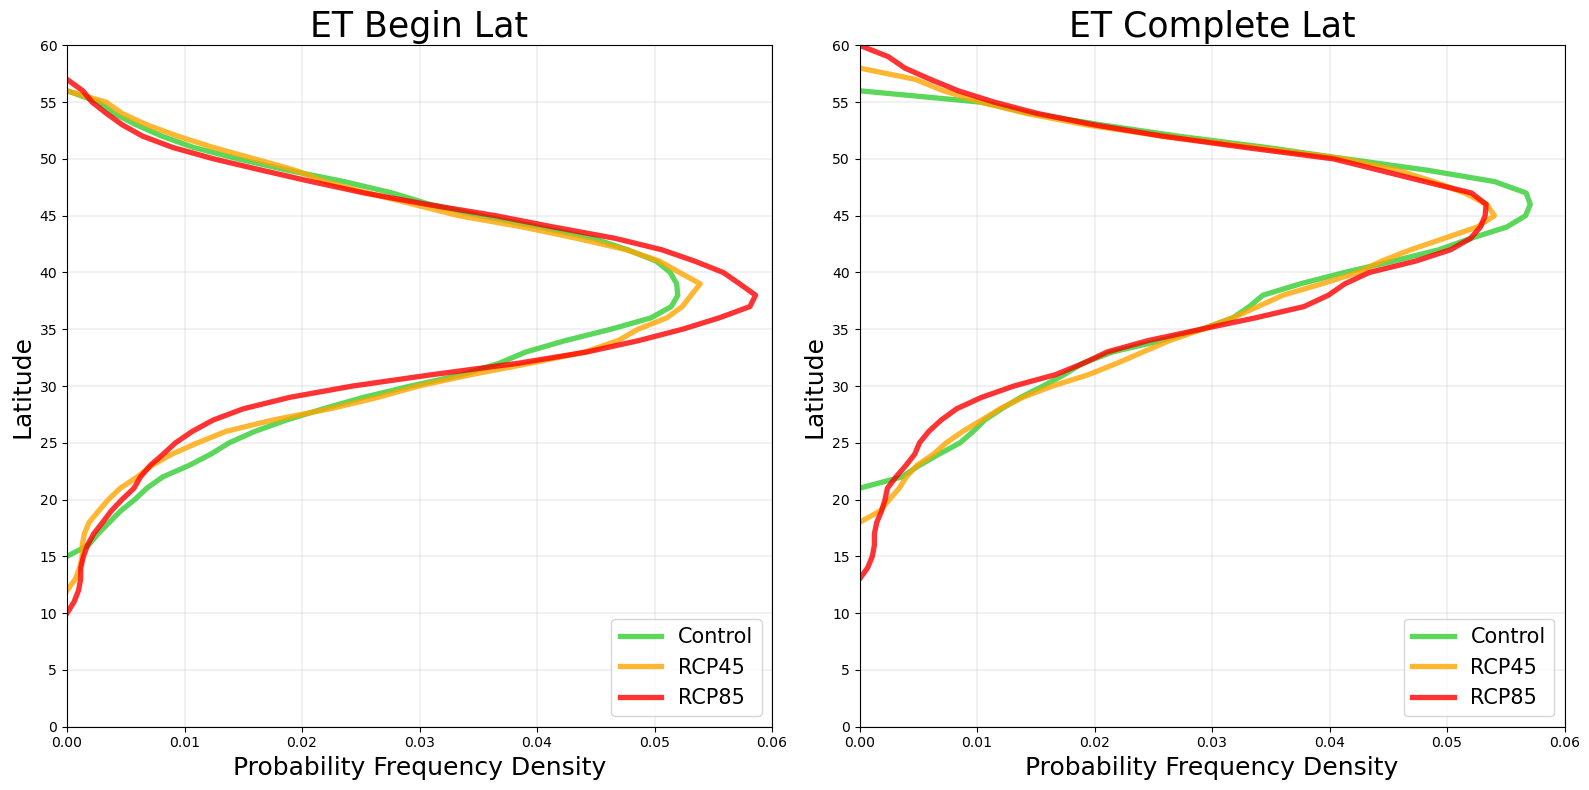

In [23]:
# Latitude
Fig = pyplot.figure(figsize=(16,8))
Params = Create_Bins(1,10,1)
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Begin Lat", True, True, False, 1, Params)
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Complete Lat", False, True, False, 1, Params)
pyplot.tight_layout()
Figname = str('ET_Latitude_Probability.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

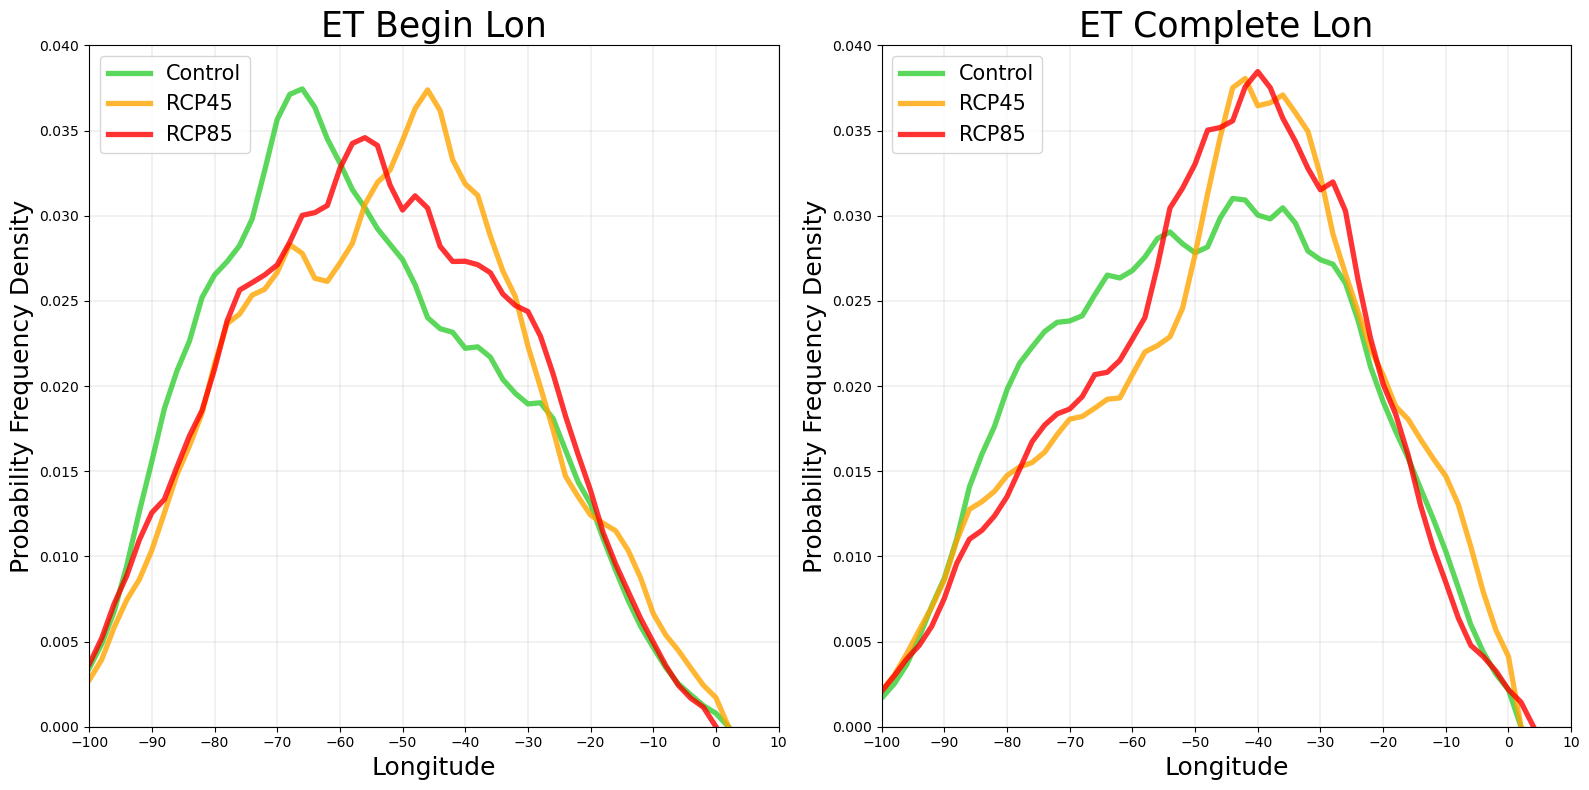

In [24]:
# Longitude
Fig = pyplot.figure(figsize=(16,8))
Params = Create_Bins(2,20,2)
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Begin Lon", True, False, True, -2, Params)
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Complete Lon", False, False, True, -2, Params)
pyplot.tight_layout()
Figname = str('ET_Longitude_Probability.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

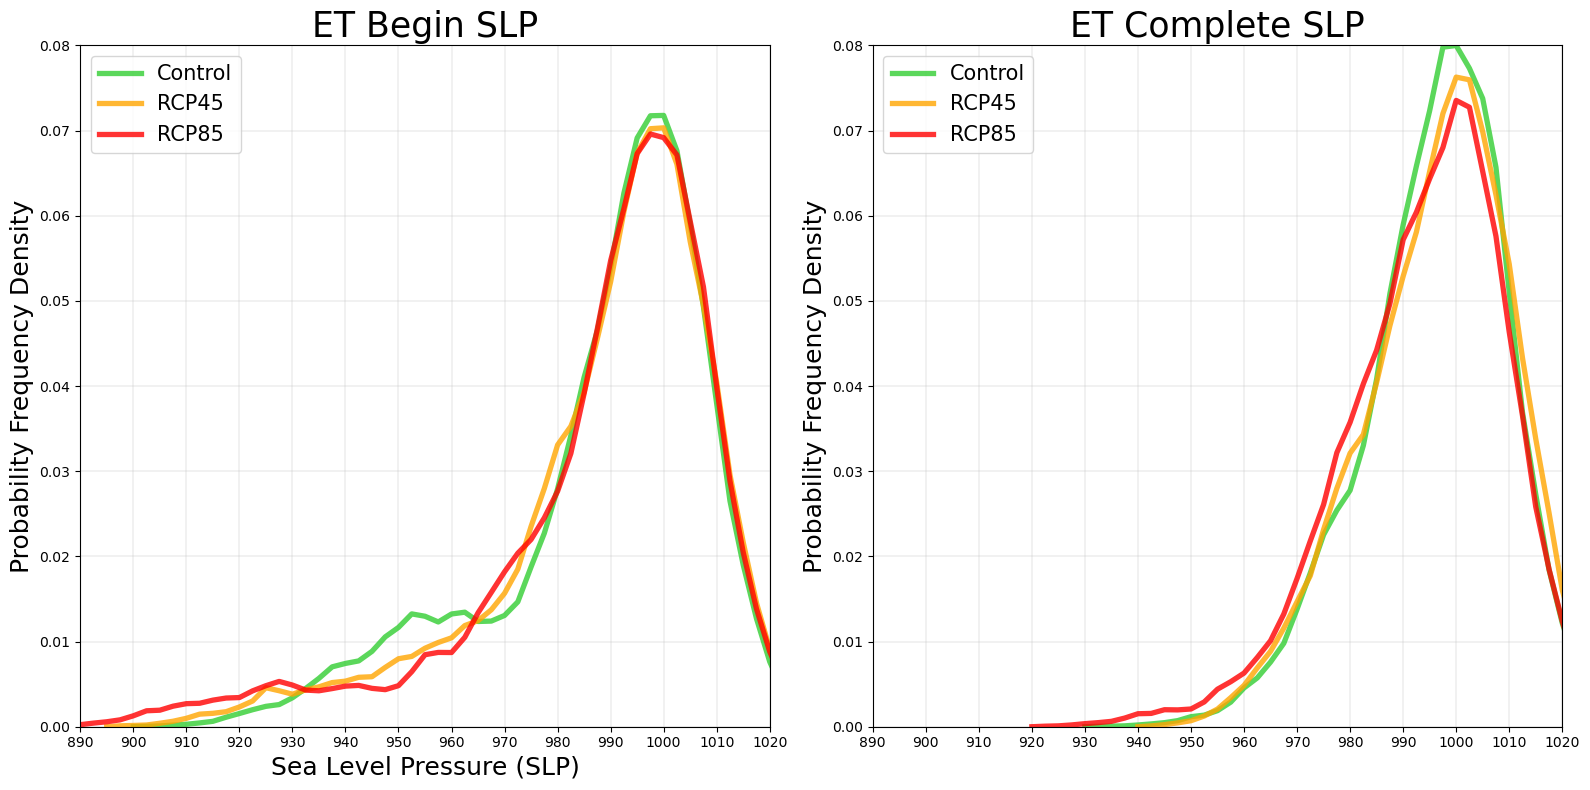

In [25]:
# Longitude
Fig = pyplot.figure(figsize=(16,8))
Params = Create_Bins(2,20,2)
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Begin SLP", True, False, True, -2.5, Params)
ET_Prob_Dist_Plot(Fig, Control_ET, RCP45_ET, RCP85_ET, "ET Complete SLP", False, False, True, -2.5, Params)
pyplot.tight_layout()
Figname = str('ET_SLP_Probability.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [26]:
# Create Function to Plot Phase Space Parameters Cumulative Distributions
def Param_Cum_Dist_Plot(Fig, Data_DF_1, Data_DF_2, Data_DF_3, Var, Ascend, Horiz):
    if Var == "B":
        Axis = Fig.add_subplot(1,2,1)
    elif Var == "VLT":
        Axis = Fig.add_subplot(1,2,2)
#
# Apply Cumulative Distribution Function
    Sorted_1, Density_1 = Cum_Dist(Data_DF_1[Var], Ascend)
    Sorted_2, Density_2 = Cum_Dist(Data_DF_2[Var], Ascend)
    Sorted_3, Density_3 = Cum_Dist(Data_DF_3[Var], Ascend)
#
# Plotting
    if Horiz == True:
        Axis.plot(Sorted_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Sorted_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Sorted_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
    else:
        Axis.plot(Density_1, Sorted_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Sorted_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Sorted_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
#
# Formatting Based on Variable
    Param_Cum_Dist_Formatting(Sorted_1, Sorted_2, Sorted_3, Var, Horiz)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [27]:
# Formatting Based on Variable
def Param_Cum_Dist_Formatting(Vals_1, Vals_2, Vals_3, Var, Horiz):
# x Ticks and Lims
    if Var == "B":
        Min = -25
        Max = 90
        Width = 15
    elif Var == "VLT" or Var == "VUT":
        Min = -350
        Max = 350
        Width = 100
    x_Ticks = Create_Bins(Min, Max, Width)
#
# y Ticks and Lims
    if Horiz == True:
        pyplot.xticks(x_Ticks)
        pyplot.xlim(Min, Max)
        pyplot.yticks(Create_Bins(0,1,0.125))
        pyplot.ylim(0,1)
    else:
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(Create_Bins(0,1,0.125))
        pyplot.xlim(0,1)
#
# Labels and Title
    if Horiz == True:
        pyplot.ylabel("Cumulative Frequency Density", fontsize=18)
        pyplot.xlabel(Var, fontsize=18)
    else:
        pyplot.xlabel("Cumulative Frequency Density", fontsize=18)
        pyplot.ylabel(Var, fontsize=18)
    Title = Var
    pyplot.title(Title, fontsize=25)
#
# Legend
    pyplot.legend(loc=2, fontsize=15)

In [28]:
# Create Function to Plot ET Cumulative Distributions
def Param_Prob_Dist_Plot(Fig, Data_DF_1, Data_DF_2, Data_DF_3, Var, Subset, n, Ascend, Horiz, Width, Params):
    if Subset == "All":
        if Var == "B":
            Axis = Fig.add_subplot(1,2,1)
        elif Var == "VLT":
            Axis = Fig.add_subplot(1,2,2)
    else:
        if Var == "B":
            Axis = Fig.add_subplot(4,2,n*2+1)
        elif Var == "VLT":
            Axis = Fig.add_subplot(4,2,n*2+2)
#
# Apply Probability Distribution Function For Different Params
    Values_1, Density_1 = Prob_Dist_Combine(Data_DF_1, Var, Ascend, Width, Params)
    Values_2, Density_2 = Prob_Dist_Combine(Data_DF_2, Var, Ascend, Width, Params)
    Values_3, Density_3 = Prob_Dist_Combine(Data_DF_3, Var, Ascend, Width, Params)
#
# Plotting
    if Horiz == True:
        Axis.plot(Values_1, Density_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Values_2, Density_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Values_3, Density_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
    else:
        Axis.plot(Density_1, Values_1, color='limegreen', linewidth=3.8, label='Control', alpha=0.8)
        Axis.plot(Density_2, Values_2, color='orange', linewidth=3.8, label='RCP45', alpha=0.8)
        Axis.plot(Density_3, Values_3, color='red', linewidth=3.8, label='RCP85', alpha=0.8)
#
# Formatting Based on Variable
    Param_Prob_Dist_Formatting(Values_1, Values_2, Values_3, Density_1, Density_2, Density_3, \
    Var, Subset, Horiz)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [29]:
# Formatting Based on Variable
def Param_Prob_Dist_Formatting(Vals_1, Vals_2, Vals_3, Dens_1, Dens_2, Dens_3, Var, Subset, Horiz):
# x Ticks and Lims
    if Var == "B":
        Min = -25
        Max = 90
        Width = 15
    elif Var == "VLT" or Var == "VUT":
        Min = -350
        Max = 350
        Width = 100
    x_Ticks = Create_Bins(Min, Max, Width)
#
# y Ticks and Lims
    if Subset == "All":
#        if Var == "B":
        y_Max = 0.05
        y_Width = 0.005
#        elif Var == "VLT" or Var == "VUT":
#            y_Max = 0.05
#            y_Width = 0.005
    else:
#        if Var == "B":
        y_Max = 0.06
#        elif Var == "VLT" or Var == "VUT":
#            y_Max = 0.06
        y_Width = 0.01
    y_Ticks = Create_Bins(0, y_Max, y_Width)
    if Horiz == True:
        pyplot.xticks(x_Ticks)
        pyplot.xlim(Min, Max)
        pyplot.yticks(y_Ticks)
        pyplot.ylim(0,y_Max)
    else:
        pyplot.yticks(x_Ticks)
        pyplot.ylim(Min, Max)
        pyplot.xticks(y_Ticks)
        pyplot.xlim(0,y_Max)
#
# Labels and Title
    if Horiz == True:
        pyplot.ylabel("Probability Frequency Density", fontsize=18)
        pyplot.xlabel(Var, fontsize=18)
    else:
        pyplot.xlabel("Probability Frequency Density", fontsize=18)
        pyplot.ylabel(Var, fontsize=18)
    if Subset == "All":
        Title = Var
    else:
        Title = Var + " (" + Subset + ")"
        pyplot.title(Title, fontsize=25)
#
# Legend
    if Var == "B":
        pyplot.legend(loc=1, fontsize=15)
    elif Var == "VLT":
        pyplot.legend(loc=2, fontsize=15)

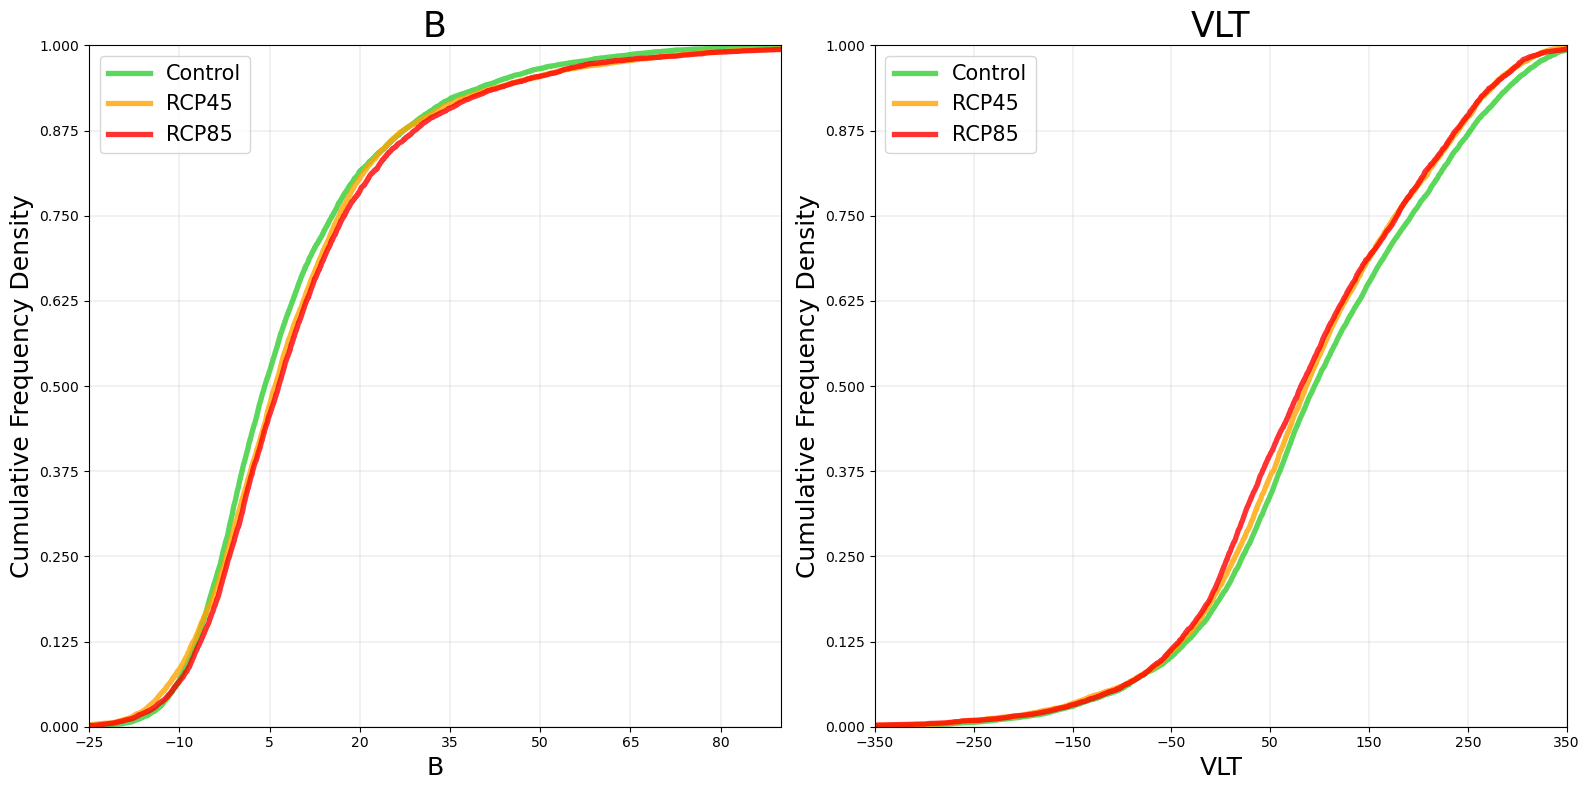

In [30]:
# B and VLT
Fig = pyplot.figure(figsize=(16,8))
Param_Cum_Dist_Plot(Fig, Control_Data, RCP45_Data, RCP85_Data, "B", True, True)
Param_Cum_Dist_Plot(Fig, Control_Data, RCP45_Data, RCP85_Data, "VLT", True, True)
pyplot.tight_layout()
Figname = str('B_VLT_Cumulative.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

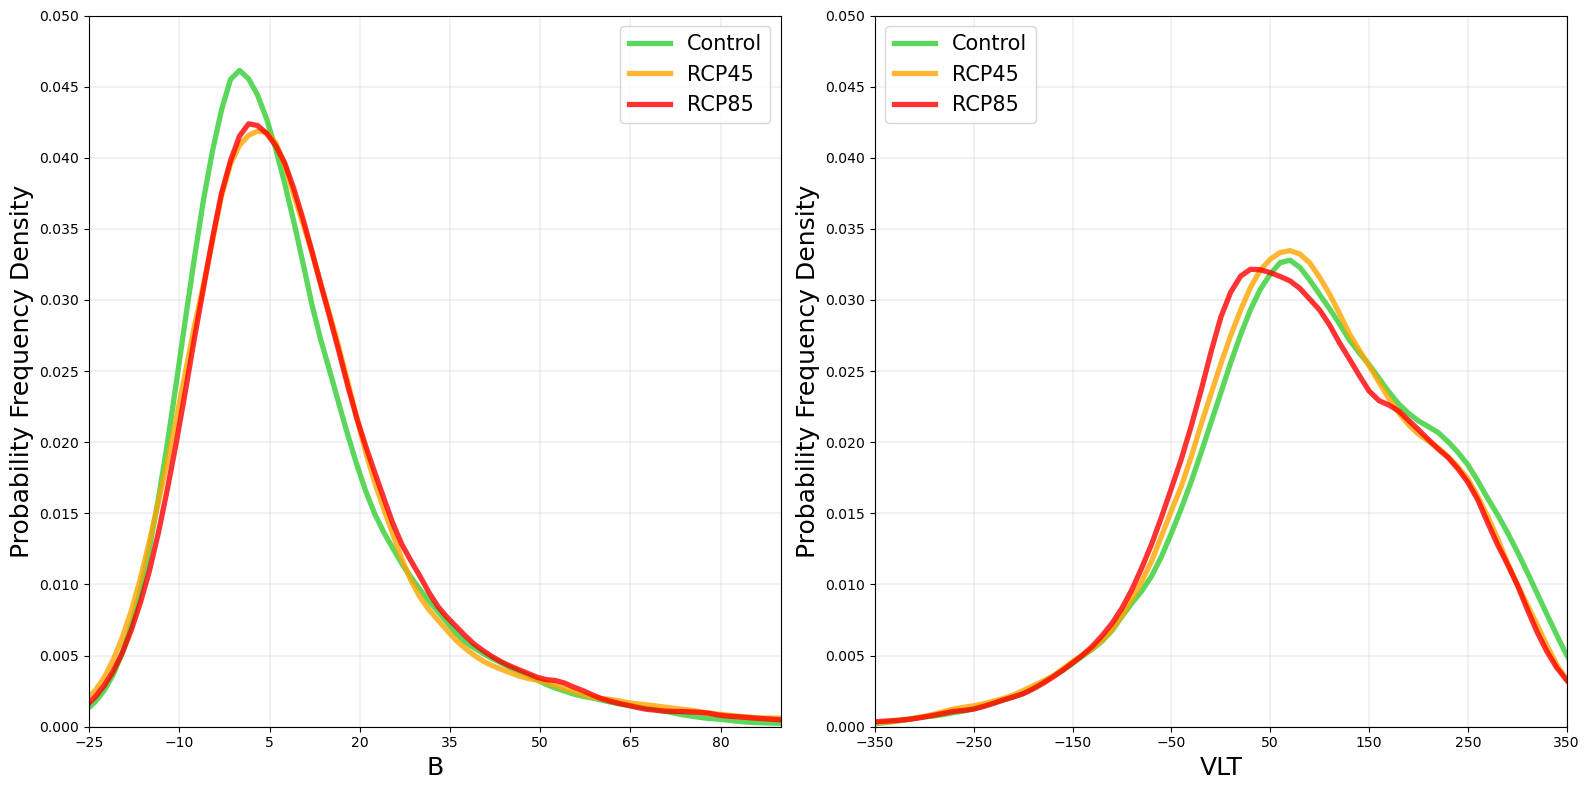

In [31]:
# B and VLT
Fig = pyplot.figure(figsize=(16,8))
Params_B = Create_Bins(1.5,15,1.5)
Params_VLT = Create_Bins(10,100,10)
Param_Prob_Dist_Plot(Fig, Control_Data, RCP45_Data, RCP85_Data, "B", "All", 0, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_Data, RCP45_Data, RCP85_Data, "VLT", "All", 0, True, True, 10, Params_VLT)
pyplot.tight_layout()
Figname = str('B_VLT_Probability.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [32]:
# Create Subset of Data: Above 1000hPa
Control_1000hPa_Above = Control_Data[Control_Data["SLP(hPa)"] > 1000].reset_index()
RCP45_1000hPa_Above = RCP45_Data[RCP45_Data["SLP(hPa)"] > 1000].reset_index()
RCP85_1000hPa_Above = RCP85_Data[RCP85_Data["SLP(hPa)"] > 1000].reset_index()

In [33]:
# Create Subset of Data: 990~1000hPa
Control_990_1000hPa = Control_Data[(Control_Data["SLP(hPa)"] > 990) & (Control_Data["SLP(hPa)"] <= 1000)].reset_index()
RCP45_990_1000hPa = RCP45_Data[(RCP45_Data["SLP(hPa)"] > 990) & (RCP45_Data["SLP(hPa)"] <= 1000)].reset_index()
RCP85_990_1000hPa = RCP85_Data[(RCP85_Data["SLP(hPa)"] > 990) & (RCP85_Data["SLP(hPa)"] <= 1000)].reset_index()

In [34]:
# Create Subset of Data: 980~990hPa
Control_980_990hPa = Control_Data[(Control_Data["SLP(hPa)"] > 980) & (Control_Data["SLP(hPa)"] <= 990)].reset_index()
RCP45_980_990hPa = RCP45_Data[(RCP45_Data["SLP(hPa)"] > 980) & (RCP45_Data["SLP(hPa)"] <= 990)].reset_index()
RCP85_980_990hPa = RCP85_Data[(RCP85_Data["SLP(hPa)"] > 980) & (RCP85_Data["SLP(hPa)"] <= 990)].reset_index()

In [35]:
# Create Subset of Data: Below 980hPa
Control_980hPa_Below = Control_Data[Control_Data["SLP(hPa)"] <= 980].reset_index()
RCP45_980hPa_Below = RCP45_Data[RCP45_Data["SLP(hPa)"] <= 980].reset_index()
RCP85_980hPa_Below = RCP85_Data[RCP85_Data["SLP(hPa)"] <= 980].reset_index()

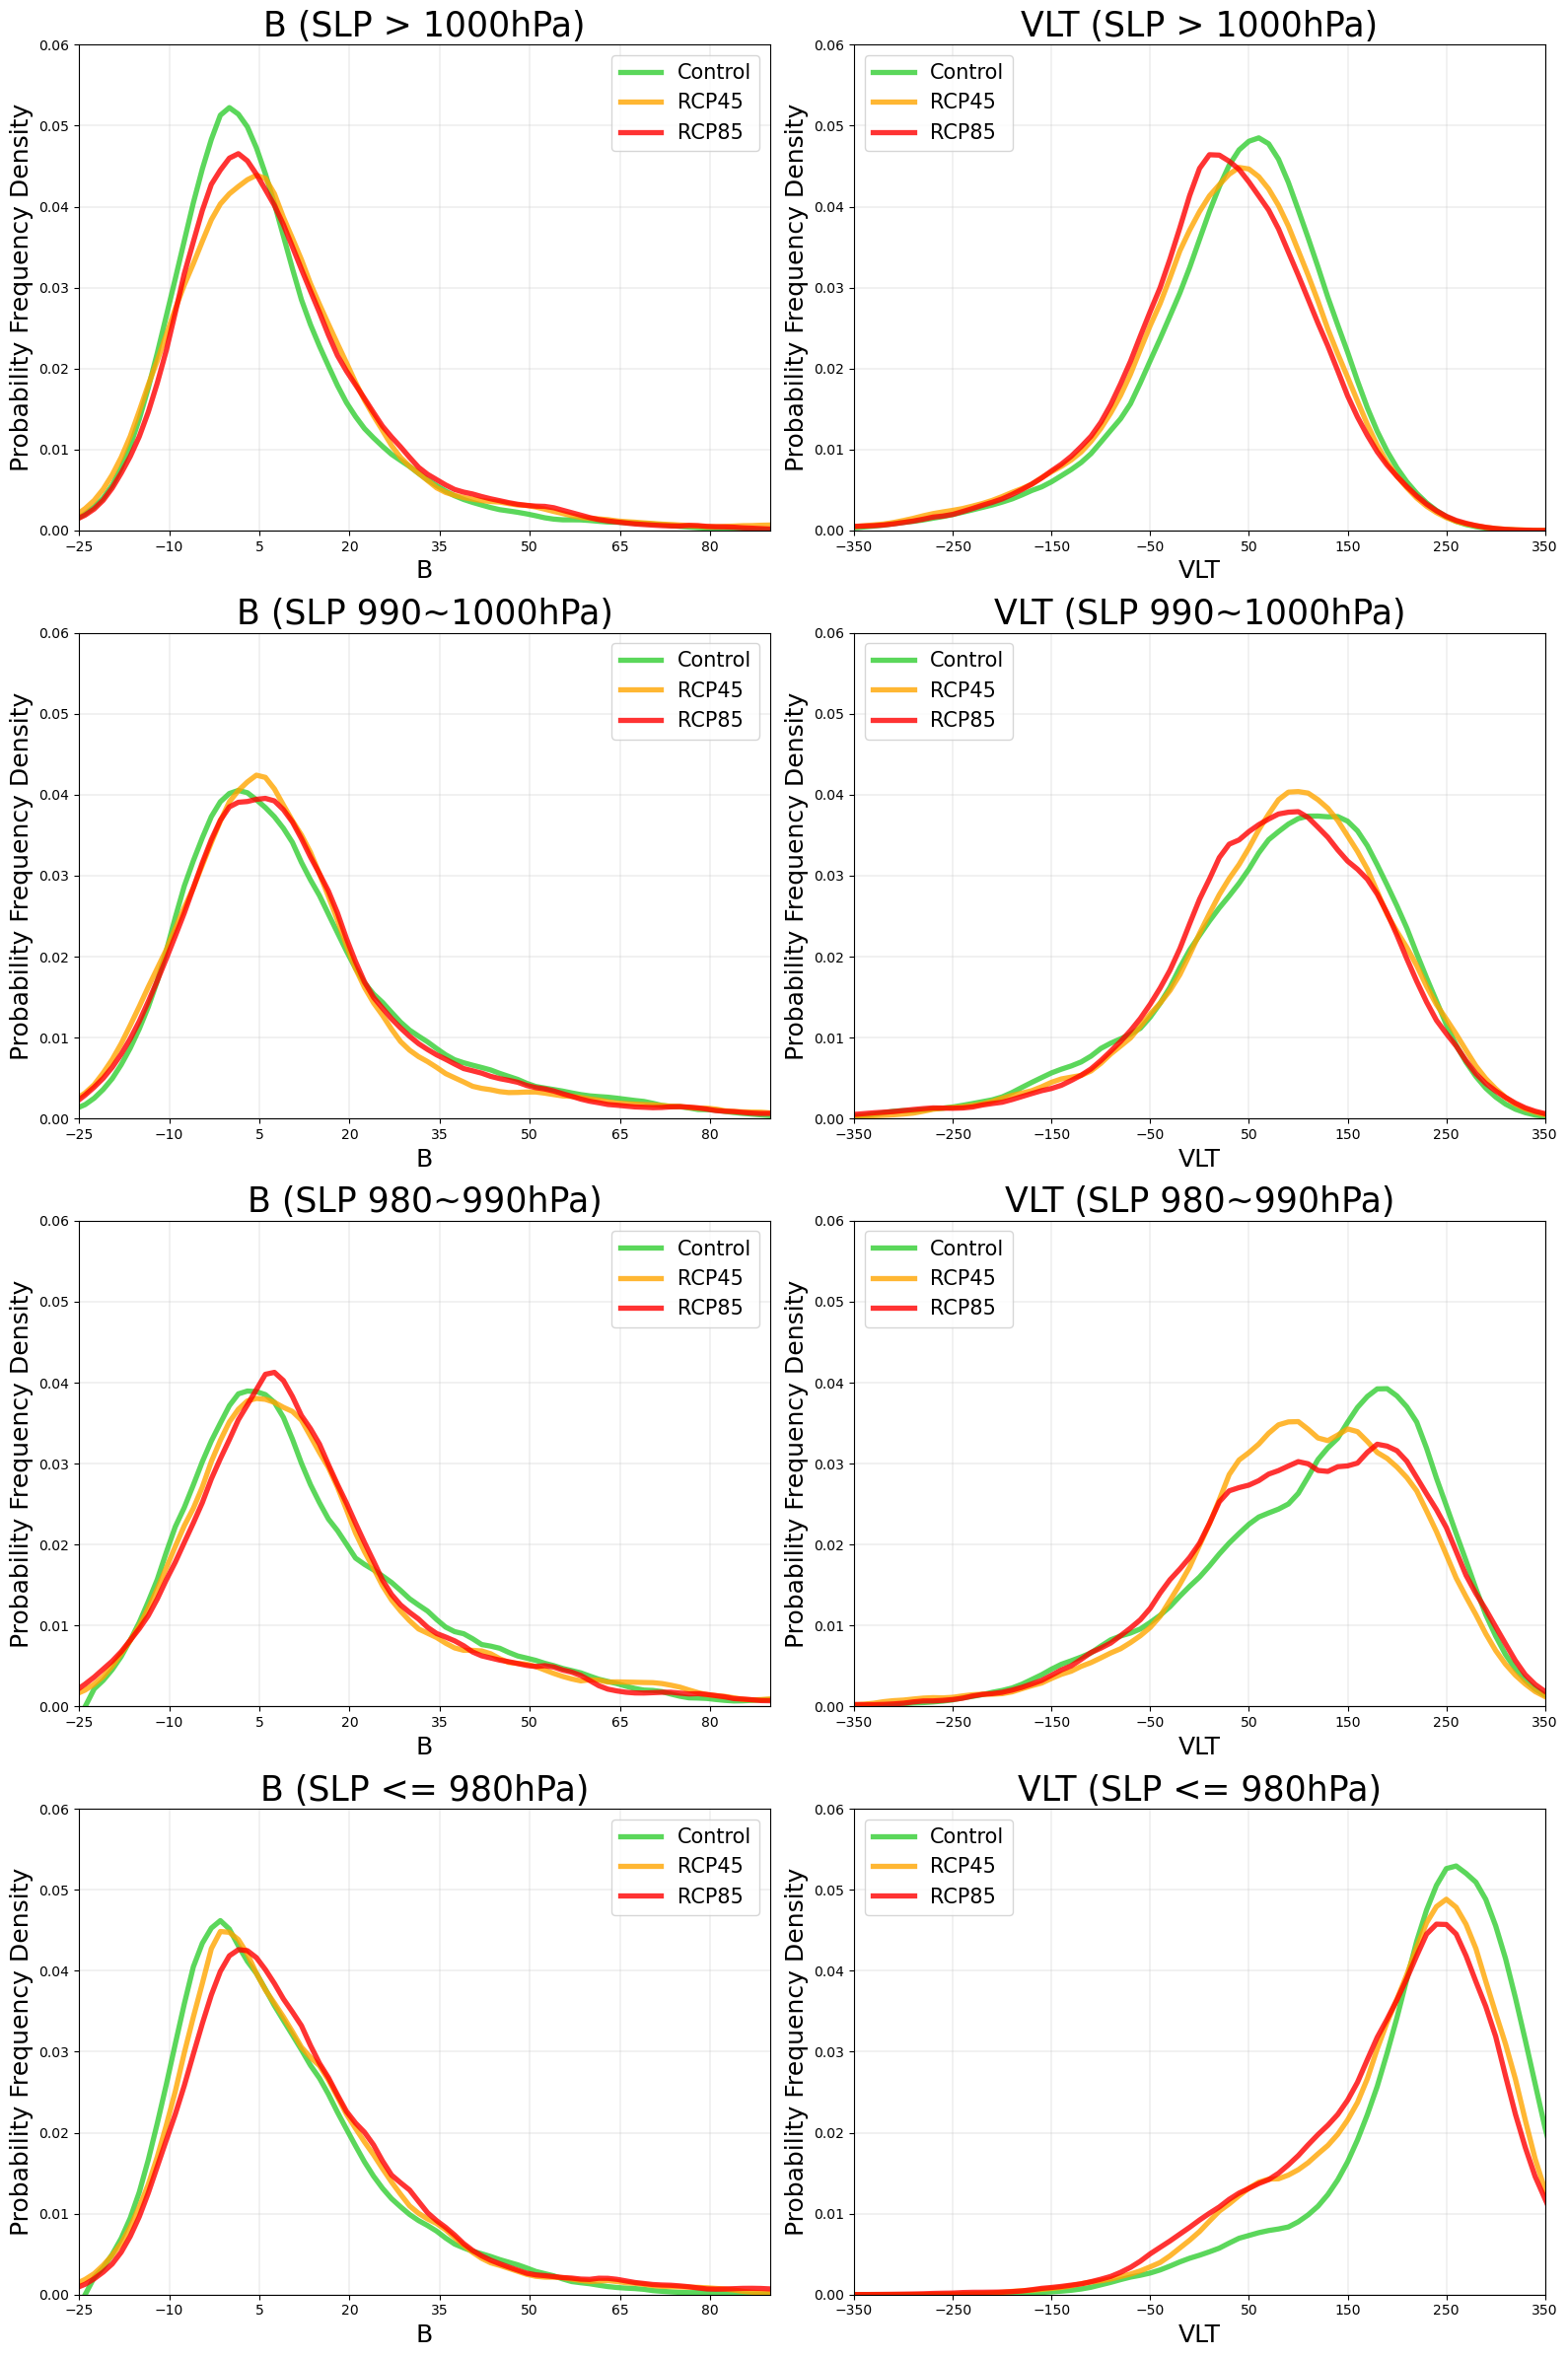

In [36]:
# Subset by Pressure
Fig = pyplot.figure(figsize=(16,24))
Params_B = Create_Bins(1.5,15,1.5)
Params_VLT = Create_Bins(10,100,10)
# Above 1000hPa
Param_Prob_Dist_Plot(Fig, Control_1000hPa_Above, RCP45_1000hPa_Above, RCP85_1000hPa_Above, "B", "SLP > 1000hPa", 0, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_1000hPa_Above, RCP45_1000hPa_Above, RCP85_1000hPa_Above, "VLT", "SLP > 1000hPa", 0, True, True, 10, Params_VLT)
# 990-1000hPa
Param_Prob_Dist_Plot(Fig, Control_990_1000hPa, RCP45_990_1000hPa, RCP85_990_1000hPa, "B", "SLP 990~1000hPa", 1, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_990_1000hPa, RCP45_990_1000hPa, RCP85_990_1000hPa, "VLT", "SLP 990~1000hPa", 1, True, True, 10, Params_VLT)
# 980-990hPa
Param_Prob_Dist_Plot(Fig, Control_980_990hPa, RCP45_980_990hPa, RCP85_980_990hPa, "B", "SLP 980~990hPa", 2, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_980_990hPa, RCP45_980_990hPa, RCP85_980_990hPa, "VLT", "SLP 980~990hPa", 2, True, True, 10, Params_VLT)
# Below 980hPa
Param_Prob_Dist_Plot(Fig, Control_980hPa_Below, RCP45_980hPa_Below, RCP85_980hPa_Below, "B", "SLP <= 980hPa", 3, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_980hPa_Below, RCP45_980hPa_Below, RCP85_980hPa_Below, "VLT", "SLP <= 980hPa", 3, True, True, 10, Params_VLT)
pyplot.tight_layout()
Figname = str('B_VLT_Subset_SLP.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [37]:
# Create Subset of Data: Below 25N Latitude
Control_25N_Below = Control_Data[Control_Data["Lat"] < 25].reset_index()
RCP45_25N_Below = RCP45_Data[RCP45_Data["Lat"] < 25].reset_index()
RCP85_25N_Below = RCP85_Data[RCP85_Data["Lat"] < 25].reset_index()

In [38]:
# Create Subset of Data: 25~30N
Control_25_30N = Control_Data[(Control_Data["Lat"] >= 25) & (Control_Data["Lat"] < 30)].reset_index()
RCP45_25_30N = RCP45_Data[(RCP45_Data["Lat"] >= 25) & (RCP45_Data["Lat"] < 30)].reset_index()
RCP85_25_30N = RCP85_Data[(RCP85_Data["Lat"] >= 25) & (RCP85_Data["Lat"] < 30)].reset_index()

In [39]:
# Create Subset of Data: 30~35N
Control_30_35N = Control_Data[(Control_Data["Lat"] >= 30) & (Control_Data["Lat"] < 35)].reset_index()
RCP45_30_35N = RCP45_Data[(RCP45_Data["Lat"] >= 30) & (RCP45_Data["Lat"] < 35)].reset_index()
RCP85_30_35N = RCP85_Data[(RCP85_Data["Lat"] >= 30) & (RCP85_Data["Lat"] < 35)].reset_index()

In [40]:
# Create Subset of Data: Above 35N Latitude
Control_35N_Above = Control_Data[Control_Data["Lat"] >= 35].reset_index()
RCP45_35N_Above = RCP45_Data[RCP45_Data["Lat"] >= 35].reset_index()
RCP85_35N_Above = RCP85_Data[RCP85_Data["Lat"] >= 35].reset_index()

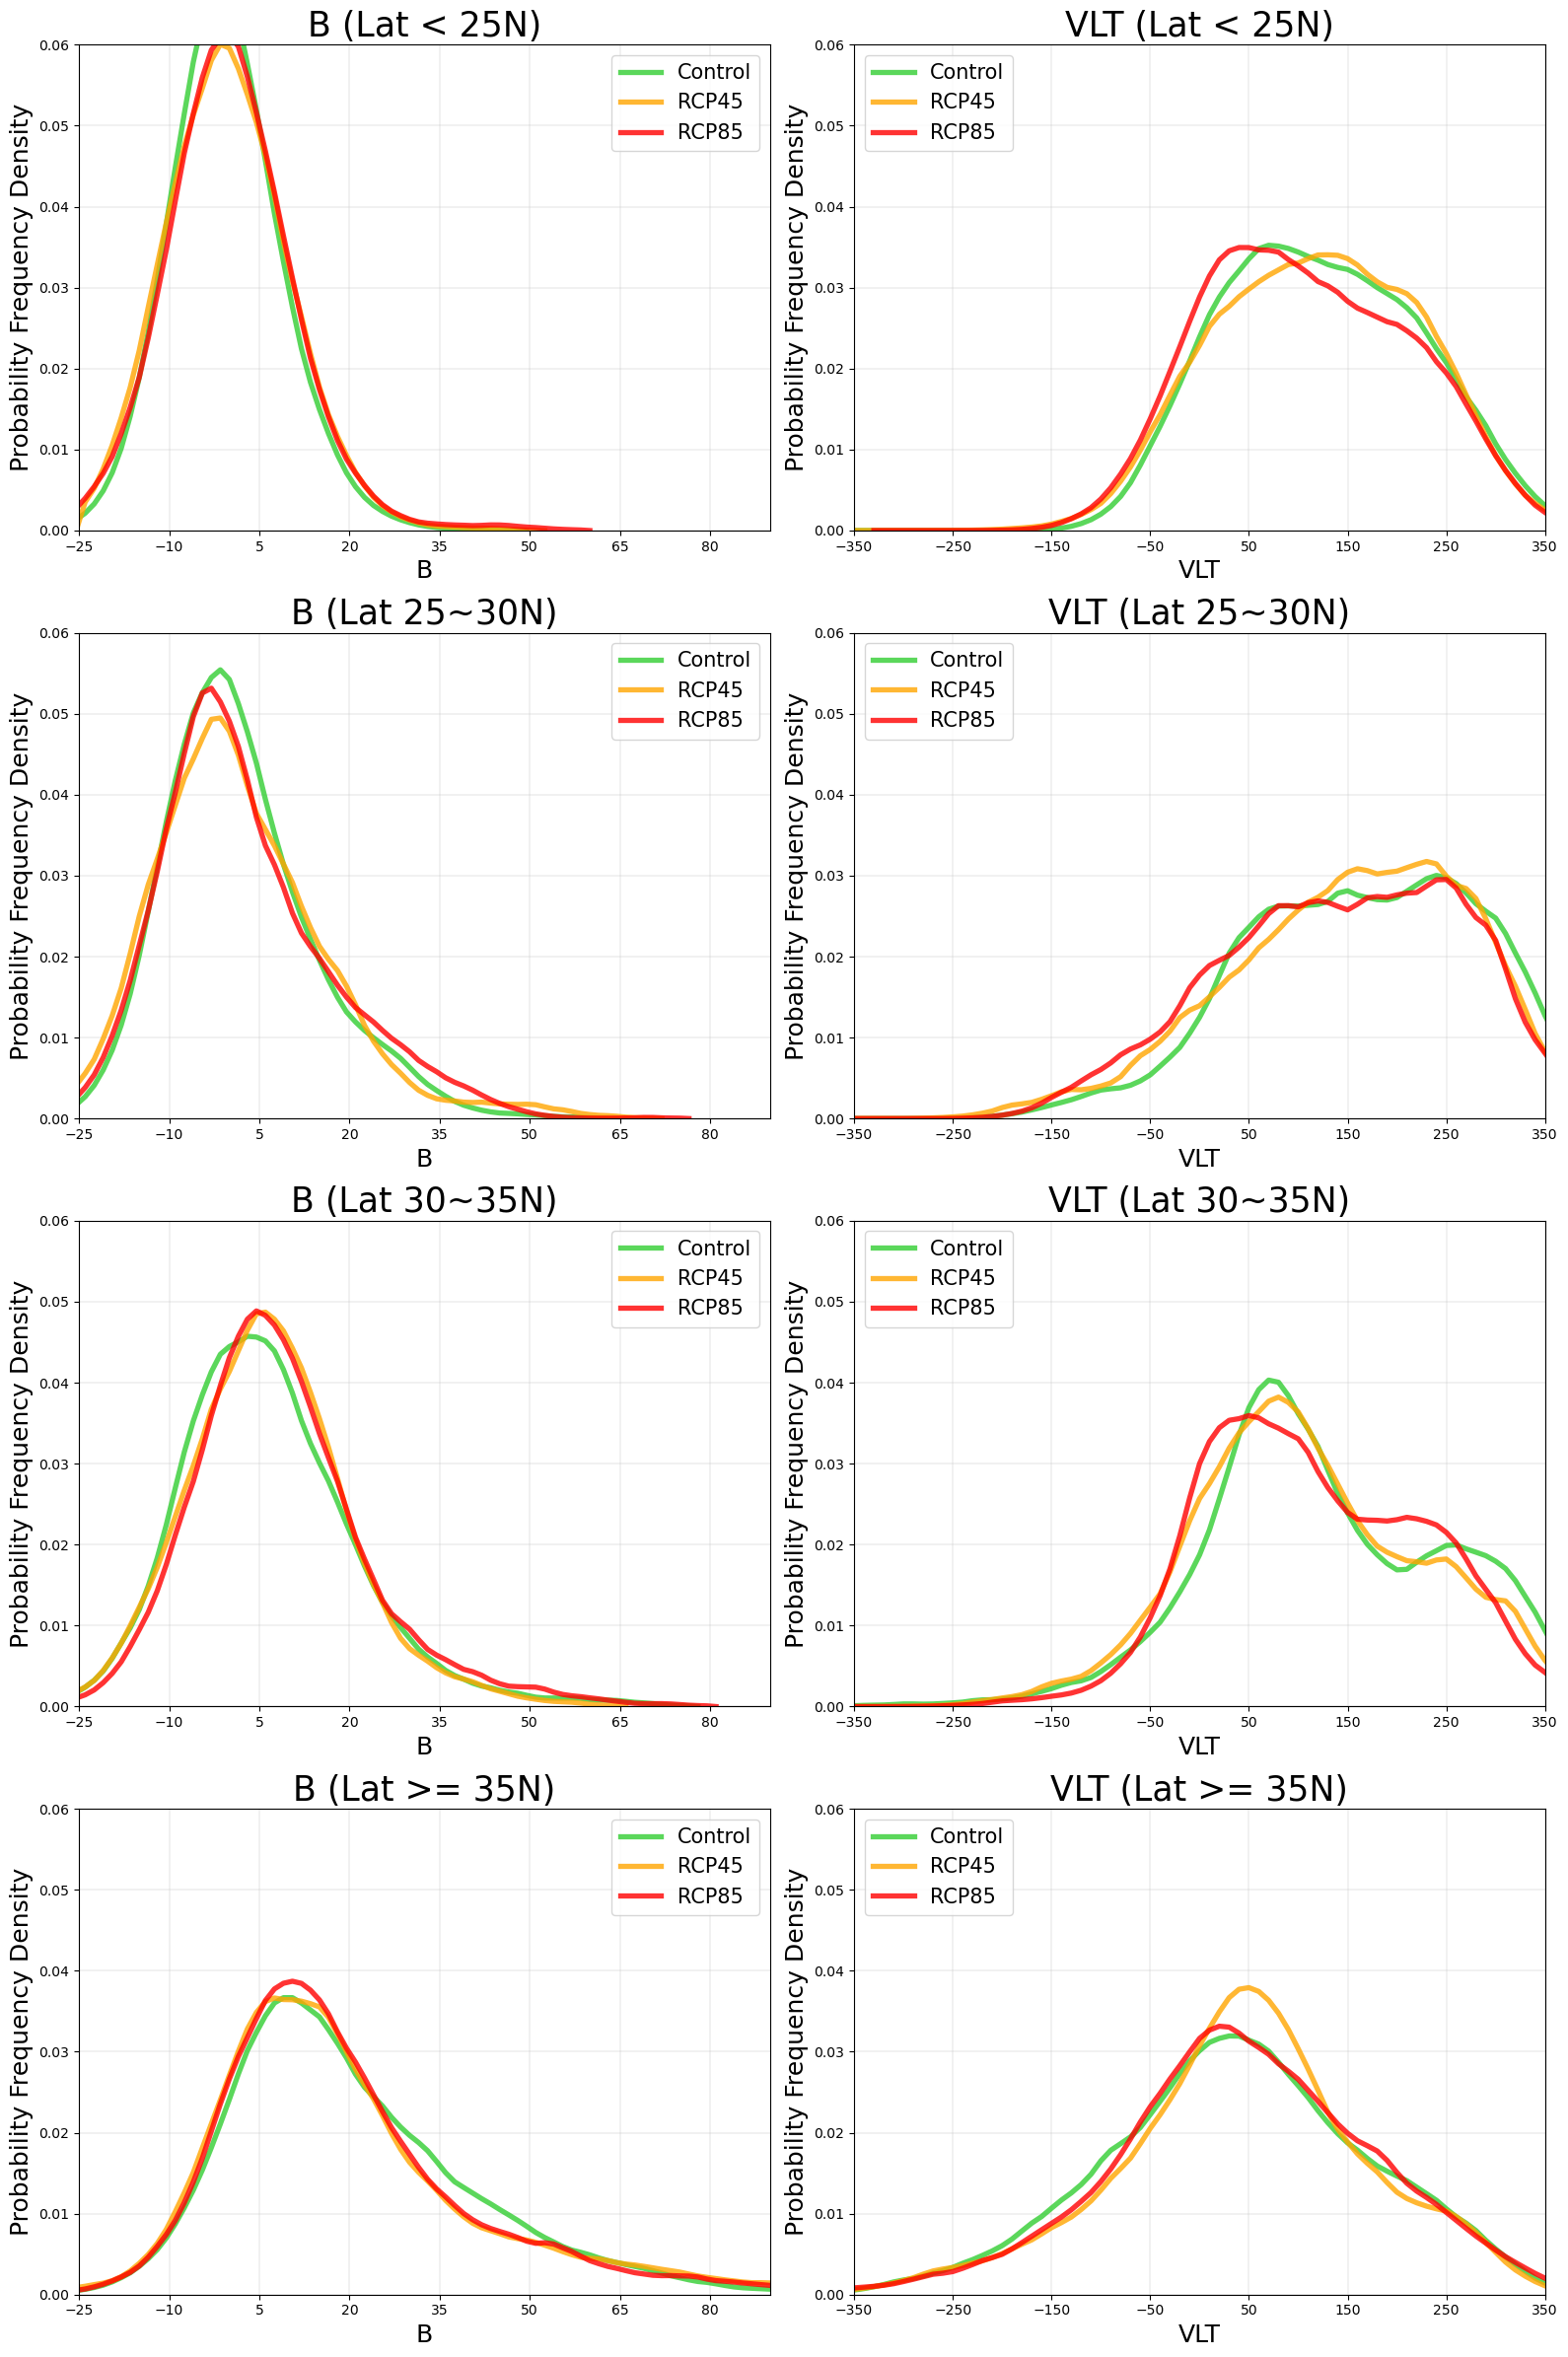

In [41]:
# Subset by Pressure
Fig = pyplot.figure(figsize=(16,24))
# Above 1000hPa
Param_Prob_Dist_Plot(Fig, Control_25N_Below, RCP45_25N_Below, RCP85_25N_Below, "B", "Lat < 25N", 0, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_25N_Below, RCP45_25N_Below, RCP85_25N_Below, "VLT", "Lat < 25N", 0, True, True, 10, Params_VLT)
# 990-1000hPa
Param_Prob_Dist_Plot(Fig, Control_25_30N, RCP45_25_30N, RCP85_25_30N, "B", "Lat 25~30N", 1, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_25_30N, RCP45_25_30N, RCP85_25_30N, "VLT", "Lat 25~30N", 1, True, True, 10, Params_VLT)
# 980-990h
Param_Prob_Dist_Plot(Fig, Control_30_35N, RCP45_30_35N, RCP85_30_35N, "B", "Lat 30~35N", 2, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_30_35N, RCP45_30_35N, RCP85_30_35N, "VLT", "Lat 30~35N", 2, True, True, 10, Params_VLT)
# Below 980hPa
Param_Prob_Dist_Plot(Fig, Control_35N_Above, RCP45_35N_Above, RCP85_35N_Above, "B", "Lat >= 35N", 3, True, True, 1.5, Params_B)
Param_Prob_Dist_Plot(Fig, Control_35N_Above, RCP45_35N_Above, RCP85_35N_Above, "VLT", "Lat >= 35N", 3, True, True, 10, Params_VLT)
pyplot.tight_layout()
Figname = str('B_VLT_Subset_Lat.png')
Fig.savefig(Output_Diri+Figname, bbox_inches='tight')